In [41]:
import os
import numpy as np
import time
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Load the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels_list = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer'\
               , 'dog', 'frog' , 'horse' , 'ship' , 'truck']

x_train = x_train/255
x_test = x_test/255

x_train_flat = [img.flatten() for img in x_train]
x_test_flat =  [img.flatten() for img in x_test]

In [ ]:
y_train[12].item()

7

### cifar10 dataset samples

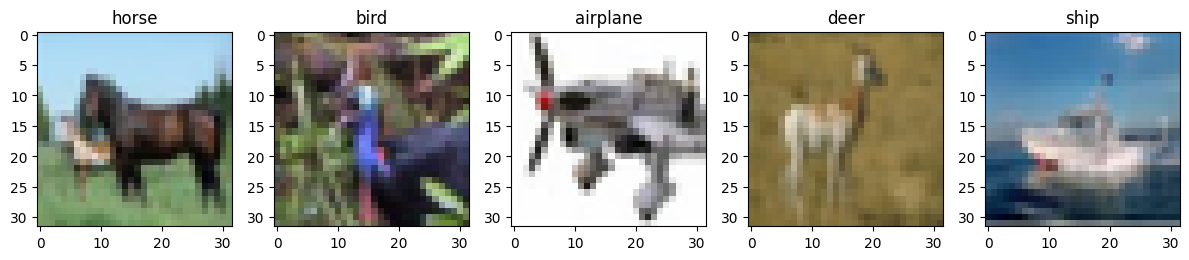

In [ ]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt

plt.subplots(1, 5, figsize=(12, 8))

plt.subplot(1,5,1)
plt.imshow(x_train[12])
plt.title(labels_list[y_train[12].item()])
plt.subplot(1,5,2)
plt.imshow(x_train[24])
plt.title(labels_list[y_train[24].item()])
plt.subplot(1,5,3)
plt.imshow(x_train[49])
plt.title(labels_list[y_train[49].item()])
plt.subplot(1,5,4)
plt.imshow(x_train[58])
plt.title(labels_list[y_train[58].item()])
plt.subplot(1,5,5)
plt.imshow(x_train[62])
plt.title(labels_list[y_train[62].item()])
plt.tight_layout()
plt.show()

## PCA & Isomap

In [ ]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
pca.fit(x_train_flat)
Xdata_pca_1 = pca.transform(x_train_flat)
Xdata_test_pca_1 = pca.transform(x_test_flat)

CPU times: user 33.3 s, sys: 5.1 s, total: 38.4 s
Wall time: 23.8 s


In [ ]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
pca.fit(x_train_flat)
Xdata_pca_2 = pca.transform(x_train_flat)
Xdata_test_pca_2 = pca.transform(x_test_flat)

CPU times: user 22.4 s, sys: 3.18 s, total: 25.6 s
Wall time: 16.1 s


In [ ]:
import gc
gc.collect()

0

In [ ]:
%%time
from sklearn.manifold import Isomap
iso = Isomap(n_components = 40)
iso.fit(x_train_flat[:5000])
Xdata_isomap_1 = iso.transform(x_train_flat)
Xdata_test_isomap_1 = iso.transform(x_test_flat)

CPU times: user 3min 12s, sys: 10.3 s, total: 3min 22s
Wall time: 2min 29s


In [ ]:
%%time
from sklearn.manifold import Isomap
iso = Isomap(n_components = 30)
iso.fit(x_train_flat[:1000])
Xdata_isomap_2 = iso.transform(x_train_flat)
Xdata_test_isomap_2 = iso.transform(x_test_flat)

CPU times: user 29 s, sys: 1.11 s, total: 30.1 s
Wall time: 19.3 s


#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

n_components = randint(1, 10)
param_grid = {'n_components': n_components}

model = PCA()

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5)

random_search.fit(x_train_flat, y_train)

print("Best parameters: ", random_search.best_params_)

Best parameters:  {'n_components': 8}


In [ ]:
from sklearn.metrics import mean_squared_error
  from scipy.stats import randint

n_components = randint(1, 20)
param_grid = {'n_components': n_components}

model = Isomap()

score = (mean_squared_error)

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5, scoring = score)

random_search.fit(x_train_flat, y_train)

print("Best parameters: ", random_search.best_params_)

Best parameters:  {n_components: 16}


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xdata_pca_1 , y_train.squeeze())
y_pred = knn.predict(Xdata_test_pca_1)
accuracy_pca = accuracy_score(y_test, y_pred)
print(f'PCA accuracy: {accuracy_pca} number of components: {40}')

PCA accuracy: 0.4096 number of components: 40


In [ ]:
del knn
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xdata_pca_2 , y_train.squeeze())
y_pred = knn.predict(Xdata_test_pca_2)
accuracy_pca = accuracy_score(y_test, y_pred)
print(f'PCA accuracy: {accuracy_pca} number of components: {30}')

PCA accuracy: 0.4175 number of components: 30


In [ ]:
del knn
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xdata_isomap_1 , y_train.squeeze())
y_pred = knn.predict(Xdata_test_isomap_1)
accuracy_isomap = accuracy_score(y_test, y_pred)
print(f'Isomap accuracy : {accuracy_isomap} number of components: {40}')

Isomap accuracy : 0.3024 number of components: 40


In [ ]:
del knn
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xdata_isomap_2 , y_train.squeeze())
y_pred = knn.predict(Xdata_test_isomap_2)
accuracy_isomap = accuracy_score(y_test, y_pred)
print(f'Isomap accuracy : {accuracy_isomap} number of components: {30}')

Isomap accuracy : 0.2887 number of components: 30


### Random Search

#### PCA:

In [ ]:
pca = PCA(n_components = 8)
pca.fit(x_train_flat)
Xdata_pca = pca.transform(x_train_flat)
Xdata_test_pca = pca.transform(x_test_flat)

del knn

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 15)}

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

random_search.fit(Xdata_pca , y_train.squeeze())

print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')

y_pred = random_search.predict(Xdata_test_pca)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Random search with PCA dimension Reduction:{accuracy}')

Best value for n_neighbors: 12
Accuracy of Random search with PCA dimension Reduction:0.4114


#### ISOMAP:

In [ ]:
iso = Isomap(n_components = 16)
iso.fit(x_train_flat[:5000])
Xdata_isomap = iso.transform(x_train_flat)
Xdata_test_isomap = iso.transform(x_test_flat)

del knn

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 20)}

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

random_search.fit(Xdata_isomap , y_train.squeeze())

print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')

del y_pred
y_pred = random_search.predict(Xdata_test_isomap)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Random search with Isomap dimension Reduction:{accuracy}')

Best value for n_neighbors: 19
Accuracy of Random search with Isomap dimension Reduction:0.3113


### Data Split:

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,\
                                                    test_size=0.1, random_state=42)

x_train_flat = np.asarray([img.flatten() for img in x_train])
# x_test_flat = np.asarray(x_test_flat)

x_val_flat =  [img.flatten() for img in x_val]
x_val_flat = np.asarray(x_val_flat)

In [4]:
x_train.shape , x_val.shape , x_val_flat.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (5000, 3072))

## Autoencoder

In [44]:
from keras.models import Model
from keras.layers import Dense, Dropout, ReLU, Flatten, BatchNormalization, Input, MaxPooling2D, Conv2DTranspose, Conv2D, Reshape
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


input_shape = (32,32,3)
latent_dim1 = 200
latent_dim2 = 100
#Encoder
input = tf.keras.Input(shape=input_shape)
x = Flatten()(input)
x = Dense(3072)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(1536)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(768)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(384)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
encoded_1 = Dense(latent_dim1 , activation='linear')(x)
encoded_2 = Dense(latent_dim2 , activation='linear')(x)

#Decoder
x = Dense(384)(encoded_1)#
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(768)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(1536)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
output_1 = Dense(3072, activation = 'sigmoid')(x)

y = Dense(384)(encoded_2)#
y = BatchNormalization()(y)
y = ReLU()(y)
y = Dense(768)(y)
y = BatchNormalization()(y)
y = ReLU()(y)
y = Dense(1536)(y)
y = BatchNormalization()(y)
y = ReLU()(y)
output_2 = Dense(3072, activation = 'sigmoid')(y)


Autoencoder_l1 = Model(inputs = input, outputs = output_1)
Autoencoder_l2 = Model(inputs = input, outputs = output_2)


Autoencoder_l1.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
Autoencoder_l2.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

# Autoencoder.summary()

In [ ]:
history_AE_1 = Autoencoder_l1.fit(x = x_train , y = x_train_flat, validation_data = (x_val , x_val_flat), batch_size = 32 ,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 30s 11ms/step - loss: 0.0392 - val_loss: 0.0320
Epoch 2/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0319 - val_loss: 0.0372
Epoch 3/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0298 - val_loss: 0.0293
Epoch 4/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0281 - val_loss: 0.0265
Epoch 5/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0274 - val_loss: 0.0268
Epoch 6/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 7/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0267 - val_loss: 0.0265
Epoch 8/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0251 - val_loss: 0.0237
Epoch 9/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0248 - val_loss: 0.0232
Epoch 10/10
1407/1407 [==============================] - 24s 17m

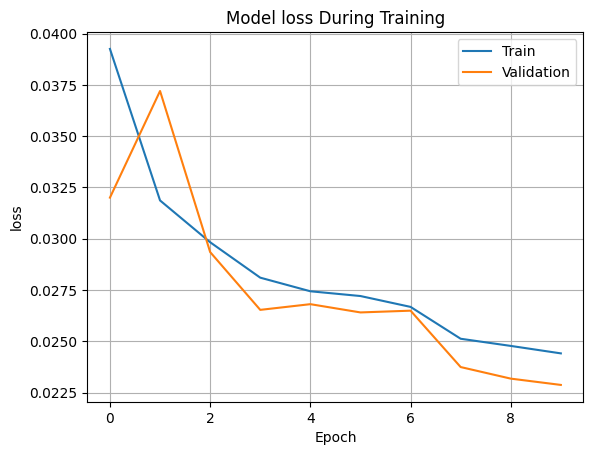

In [ ]:
plt.plot(history_AE_1.history['loss'])
plt.plot(history_AE_1.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

In [ ]:
encoder = Model(inputs = input, outputs = encoded_1)
# encoder.summary()

In [ ]:
del knn
knn = KNeighborsClassifier(n_neighbors = 25)
x_train_encoded =  encoder.predict(x_train)
knn.fit(x_train_encoded , y_train.squeeze())
x_test_encoded = encoder.predict(x_test)
y_pred = knn.predict(x_test_encoded)
accuracy_AE = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_AE}')

313/313 [==============================] - 1s 2ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.3526


In [ ]:
del knn
from math import sqrt

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, round(sqrt(200)))} #200 is the latent dimension

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

x_train_encoded =  encoder.predict(x_train.squeeze())

random_search.fit(x_train_encoded , y_train.squeeze())

x_test_encoded = encoder.predict(x_test)

y_pred = random_search.predict(x_test_encoded.squeeze())

accuracy = accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy}')

Best value for n_neighbors: 12
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.3663


#### Latent space 2

In [ ]:
history_AE_2 = Autoencoder_l2.fit(x = x_train , y = x_train_flat, validation_data = (x_val , x_val_flat), batch_size = 32 ,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 26s 14ms/step - loss: 0.0336 - val_loss: 0.0273
Epoch 2/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0261 - val_loss: 0.0260
Epoch 3/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0244 - val_loss: 0.0239
Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0241 - val_loss: 0.0250
Epoch 5/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0239 - val_loss: 0.0239
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 8/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0235 - val_loss: 0.0232
Epoch 9/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 10/10
1407/1407 [==============================] - 18s 13m

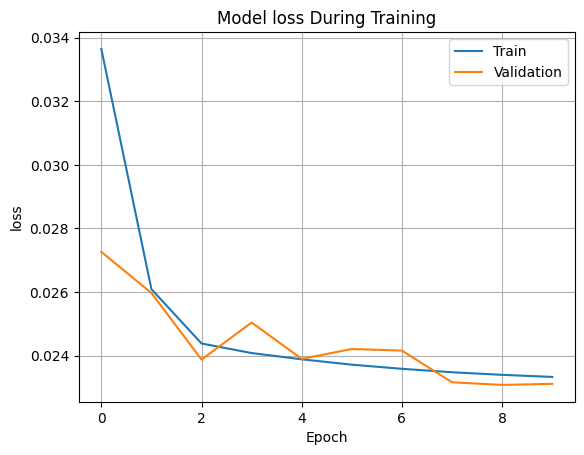

In [ ]:
plt.plot(history_AE_2.history['loss'])
plt.plot(history_AE_2.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

In [ ]:
encoder = Model(inputs = input, outputs = encoded_2)

In [ ]:
del knn
knn = KNeighborsClassifier(n_neighbors = 25)
x_train_encoded =  encoder.predict(x_train)
knn.fit(x_train_encoded , y_train.squeeze())
x_test_encoded = encoder.predict(x_test)
y_pred = knn.predict(x_test_encoded)
accuracy_AE = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_AE}')

313/313 [==============================] - 1s 3ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.3582


In [ ]:
del knn
from math import sqrt

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, round(sqrt(100)))} #100 is the latent dimension

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

x_train_encoded =  encoder.predict(x_train.squeeze())

random_search.fit(x_train_encoded , y_train.squeeze())

x_test_encoded = encoder.predict(x_test)

y_pred = random_search.predict(x_test_encoded.squeeze())

accuracy = accuracy_score(y_test, y_pred)

1407/1407 [==============================] - 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


In [ ]:
print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy}')

Best value for n_neighbors: 9
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.3784


### Using convolutional layers:

In [5]:
input = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_conv_1 = MaxPooling2D((2, 2), padding='same')(x)
encoded_conv_2 = MaxPooling2D((4, 4), padding='same')(x)


# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(encoded_conv_1)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Decoder
y = Conv2DTranspose(32, (3, 3), strides=4, activation='relu', padding='same')(encoded_conv_2)
y = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(y)
y = Conv2D(1, (2, 2), activation='sigmoid', padding='same')(y)

# Autoencoder
Autoencoder_conv_1 = Model(input, x)
Autoencoder_conv_2 = Model(input, y)

Autoencoder_conv_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
Autoencoder_conv_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

Autoencoder_conv_1.summary()
Autoencoder_conv_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 32)       9248

In [7]:
history_AE_conv_1 = Autoencoder_conv_1.fit(x = x_train , y = x_train , validation_data = (x_val , x_val), epochs=10) #

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 0.0103 - val_loss: 0.0084
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 3/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 8/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 9/10
1407/1407 [==============================] - 9s 7ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 10/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.00

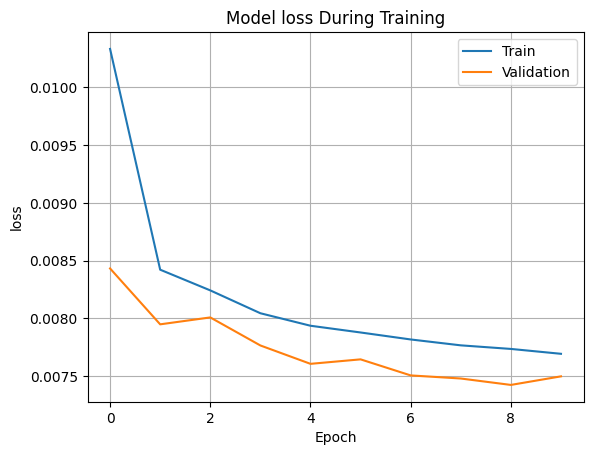

In [8]:
plt.plot(history_AE_conv_1.history['loss'])
plt.plot(history_AE_conv_1.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

In [9]:
encoder_conv = Model(inputs = input, outputs = encoded_conv_1)
# encoder_conv.summary()

In [13]:
# del knn
knn = KNeighborsClassifier(n_neighbors = 25)
x_train_encoded =  encoder_conv.predict(x_train)
x_train_encoded = x_train_encoded.reshape(45000,2048)
knn.fit(x_train_encoded , y_train.squeeze())
x_test_encoded = encoder_conv.predict(x_test)
x_test_encoded = x_test_encoded.reshape(10000,2048)
y_pred = knn.predict(x_test_encoded)
accuracy_AE_conv = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_AE_conv}')

313/313 [==============================] - 0s 1ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.3748


In [ ]:
x_train_encoded = x_train_encoded.reshape(45000, 2048)
x_train_encoded.shape

(45000, 2048)

In [ ]:
del knn
from math import sqrt
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, round(sqrt(192)))} #192 is the latent dimension

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

x_train_encoded =  encoder_conv.predict(x_train)
x_train_encoded = x_train_encoded.reshape(45000, 2048)

random_search.fit(x_train_encoded , y_train.squeeze())

x_test_encoded = encoder_conv.predict(x_test)
x_test_encoded = x_test_encoded.reshape(10000, 2048)

y_pred = random_search.predict(x_test_encoded)

accuracy = accuracy_score(y_test, y_pred)


1407/1407 [==============================] - 2s 2ms/step


In [14]:
print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')
print(f'Accuracy of Random search with AE (with convolutional layers) dimension Reduction:{accuracy}')

Best value for n_neighbors: 25
Accuracy of Random search with AE (with convolutional layers) dimension Reduction:0.3748


In [6]:
history_AE_conv_2 = Autoencoder_conv_2.fit(x = x_train , y = x_train, validation_data = (x_val , x_val), batch_size = 32 ,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 0.0206 - val_loss: 0.0186
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0181 - val_loss: 0.0177
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 4/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0175 - val_loss: 0.0172
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0173 - val_loss: 0.0173
Epoch 6/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 7/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0172 - val_loss: 0.0171
Epoch 8/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0171 - val_loss: 0.0169
Epoch 9/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0171 - val_loss: 0.0171
Epoch 10/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.

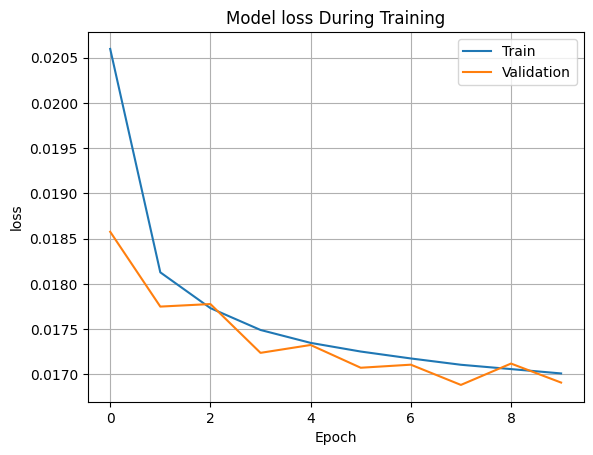

In [8]:
plt.plot(history_AE_conv_2.history['loss'])
plt.plot(history_AE_conv_2.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()

In [12]:
encoder_conv = Model(inputs = input, outputs = encoded_conv_2)
# encoder_conv.summary()

In [14]:
del knn
knn = KNeighborsClassifier(n_neighbors = 25)
x_train_encoded =  encoder_conv.predict(x_train)
x_train_encoded = x_train_encoded.reshape(45000, 512)
knn.fit(x_train_encoded , y_train.squeeze())
x_test_encoded = encoder_conv.predict(x_test)
x_test_encoded = x_test_encoded.reshape(10000, 512)
y_pred = knn.predict(x_test_encoded)
accuracy_AE_conv = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_AE_conv}')

313/313 [==============================] - 1s 2ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.4076


In [ ]:
del knn
from math import sqrt
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, round(sqrt(192)))} #192 is the latent dimension

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

x_train_encoded =  encoder_conv.predict(x_train)
x_train_encoded = x_train_encoded.reshape(45000, 2048)

random_search.fit(x_train_encoded , y_train.squeeze())

x_test_encoded = encoder_conv.predict(x_test)

y_pred = random_search.predict(x_test_encoded)

accuracy = accuracy_score(y_test, y_pred)

In [15]:
print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')
print(f'Accuracy of Random search with AE (with convolutional layers) dimension Reduction:{accuracy}')

Best value for n_neighbors: 16
Accuracy of Random search with AE (with convolutional layers) dimension Reduction:0.4076


## VAE:

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [46]:
# Encoder
input = tf.keras.Input(shape=input_shape)
x = Flatten()(input)
x = Dense(3072)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(1536)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(768)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(384)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
encoded = Dense(192 , activation='linear')(x)
z_mean = Dense(2, name="z_mean")(x)
z_log_var = Dense(2, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder_1 = Model(input, [z_mean, z_log_var, z], name="encoder")
# encoder.summary()

In [47]:
input = tf.keras.Input(shape=input_shape)
x = Flatten()(input)
x = Dense(3072)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(1536)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(768)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(384)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
encoded = Dense(192 , activation='linear')(x)
z_mean = Dense(latent_dim2, name="z_mean")(x)
z_log_var = Dense(latent_dim2, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder_2 = Model(input, [z_mean, z_log_var, z], name="encoder")
# encoder.summary()

In [19]:
# Decoder
latent_inputs = Input(shape=(2,))
x = Dense(384)(latent_inputs)#
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(768)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(1536)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(3072, activation = 'sigmoid')(x)
output = Reshape((32,32,3))(x)
decoder_1 = Model(latent_inputs, output, name="decoder")
# decoder.summary()


latent_inputs = Input(shape=(latent_dim2,))
x = Dense(384)(latent_inputs)#
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(768)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(1536)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(3072, activation = 'sigmoid')(x)
output = Reshape((32,32,3))(x)

decoder_2 = Model(latent_inputs, output, name="decoder")
# decoder.summary()

In [20]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [21]:
vae = VAE(encoder_1, decoder_1)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001))
vae.fit(x = x_train ,epochs=10)#, validation_data = (x_val , x_val_flat)

Epoch 1/10
1407/1407 [==============================] - 21s 10ms/step - loss: 671.1899 - reconstruction_loss: 655.9805 - kl_loss: 4.9049
Epoch 2/10
1407/1407 [==============================] - 14s 10ms/step - loss: 655.4757 - reconstruction_loss: 651.8135 - kl_loss: 4.0877
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 655.3439 - reconstruction_loss: 650.9453 - kl_loss: 4.2179
Epoch 4/10
1407/1407 [==============================] - 15s 11ms/step - loss: 654.8137 - reconstruction_loss: 649.6639 - kl_loss: 4.5300
Epoch 5/10
1407/1407 [==============================] - 27s 19ms/step - loss: 653.2657 - reconstruction_loss: 648.3455 - kl_loss: 4.7561
Epoch 6/10
1407/1407 [==============================] - 16s 12ms/step - loss: 651.8358 - reconstruction_loss: 647.8663 - kl_loss: 4.8988
Epoch 7/10
1407/1407 [==============================] - 19s 13ms/step - loss: 653.4427 - reconstruction_loss: 648.5109 - kl_loss: 4.7802
Epoch 8/10
1407/1407 [===================

In [33]:
x_train_encoded[-1].shape


(45000, 2)

In [38]:
del knn
knn = KNeighborsClassifier(n_neighbors = 30)
x_train_encoded =  vae.encoder.predict(x_train)
# x_train_encoded = x_train_encoded[-1].reshape(45000, 512)
knn.fit(x_train_encoded[-1] , y_train.squeeze())
x_test_encoded = vae.encoder.predict(x_test)
# x_test_encoded = x_test_encoded[-1].reshape(10000, 512)
y_pred = knn.predict(x_test_encoded[-1])
accuracy_AE_conv = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_AE_conv}')

313/313 [==============================] - 1s 2ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.2091


In [ ]:
del knn

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 10)}

random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=10)

x_train_encoded =  vae.encoder(predict(x_train))

random_search.fit(x_train_encoded , y_train)

print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')

x_test_encoded = vae.encoder(predict(x_test))

y_pred = random_search.predict(x_test_encoded)

accuracy = accuracy_score(y_test, y_pred)

In [39]:
print(f'Best value for n_neighbors: {random_search.best_params_["n_neighbors"]}')
print(f'Accuracy of Random search with AE (with convolutional layers) dimension Reduction:{accuracy}')

Best value for n_neighbors: 30
Accuracy of Random search with AE (with convolutional layers) dimension Reduction:0.2091


In [40]:
vae = VAE(encoder_2, decoder_2)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001))
vae.fit(x = x_train ,epochs=10)#, validation_data = (x_val , x_val_flat)

Epoch 1/10
1407/1407 [==============================] - 22s 10ms/step - loss: 707.3014 - reconstruction_loss: 706.0004 - kl_loss: 0.1551
Epoch 2/10
1407/1407 [==============================] - 14s 10ms/step - loss: 705.7725 - reconstruction_loss: 705.7788 - kl_loss: 9.7739e-04
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 705.6836 - reconstruction_loss: 705.7360 - kl_loss: 9.6092e-04
Epoch 4/10
1407/1407 [==============================] - 14s 10ms/step - loss: 705.8604 - reconstruction_loss: 705.7210 - kl_loss: 8.2831e-04
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 705.8367 - reconstruction_loss: 705.7134 - kl_loss: 6.7098e-04
Epoch 6/10
1407/1407 [==============================] - 14s 10ms/step - loss: 705.7478 - reconstruction_loss: 705.6942 - kl_loss: 4.7310e-04
Epoch 7/10
1407/1407 [==============================] - 13s 10ms/step - loss: 705.6904 - reconstruction_loss: 705.6912 - kl_loss: 0.0011
Epoch 8/10
1407/1407 

In [48]:
del knn
knn = KNeighborsClassifier(n_neighbors = 25)
x_train_encoded =  vae.encoder.predict(x_train)
# x_train_encoded = x_train_encoded[-1].reshape(45000, 512)
knn.fit(x_train_encoded[-1] , y_train.squeeze())
x_test_encoded = vae.encoder.predict(x_test)
# x_test_encoded = x_test_encoded[-1].reshape(10000, 512)
y_pred = knn.predict(x_test_encoded[-1])
accuracy_AE_conv = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_AE_conv}')

313/313 [==============================] - 1s 2ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.0985


### VAE with covolution layers

In [50]:
# Encoder
latent_dim = 20
encoder_inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = Flatten()(x)
x = Dense(16, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 16, 16, 32)   896         ['input_10[0][0]']               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 8, 8, 64)     18496       ['conv2d_4[0][0]']               
                                                                                                  
 flatten_6 (Flatten)            (None, 4096)         0           ['conv2d_5[0][0]']               
                                                                                            

In [51]:
# Decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = Reshape((8, 8, 64))(x)
x = Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_57 (Dense)            (None, 4096)              86016     
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 32, 32, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 32, 32, 3)        867 

In [53]:
vae = VAE(encoder_1, decoder_1)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x = x_train ,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 30s 10ms/step - loss: 705.0984 - reconstruction_loss: 660.0453 - kl_loss: 5.7326
Epoch 2/10
1407/1407 [==============================] - 14s 10ms/step - loss: 656.1381 - reconstruction_loss: 650.7741 - kl_loss: 4.6390
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 654.2197 - reconstruction_loss: 649.0257 - kl_loss: 4.5873
Epoch 4/10
1407/1407 [==============================] - 13s 10ms/step - loss: 652.9437 - reconstruction_loss: 648.3704 - kl_loss: 4.7082
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 655.7725 - reconstruction_loss: 649.4777 - kl_loss: 4.9466
Epoch 6/10
1407/1407 [==============================] - 14s 10ms/step - loss: 653.3237 - reconstruction_loss: 648.2417 - kl_loss: 4.7063
Epoch 7/10
1407/1407 [==============================] - 13s 10ms/step - loss: 653.0013 - reconstruction_loss: 647.6973 - kl_loss: 4.7316
Epoch 8/10
1407/1407 [===================

In [57]:
del knn
knn = KNeighborsClassifier(n_neighbors = 35)
x_train_encoded =  vae.encoder.predict(x_train)
# x_train_encoded = x_train_encoded[-1].reshape(45000, 512)
knn.fit(x_train_encoded[-1] , y_train.squeeze())
x_test_encoded = vae.encoder.predict(x_test)
# x_test_encoded = x_test_encoded[-1].reshape(10000, 512)
y_pred = knn.predict(x_test_encoded[-1])
accuracy_VAE_conv = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random search with AE (with Dense layers) dimension Reduction:{accuracy_VAE_conv}')

313/313 [==============================] - 1s 2ms/step
Accuracy of Random search with AE (with Dense layers) dimension Reduction:0.2264


### Grid

1/1 [==============================] - 0s 17ms/step


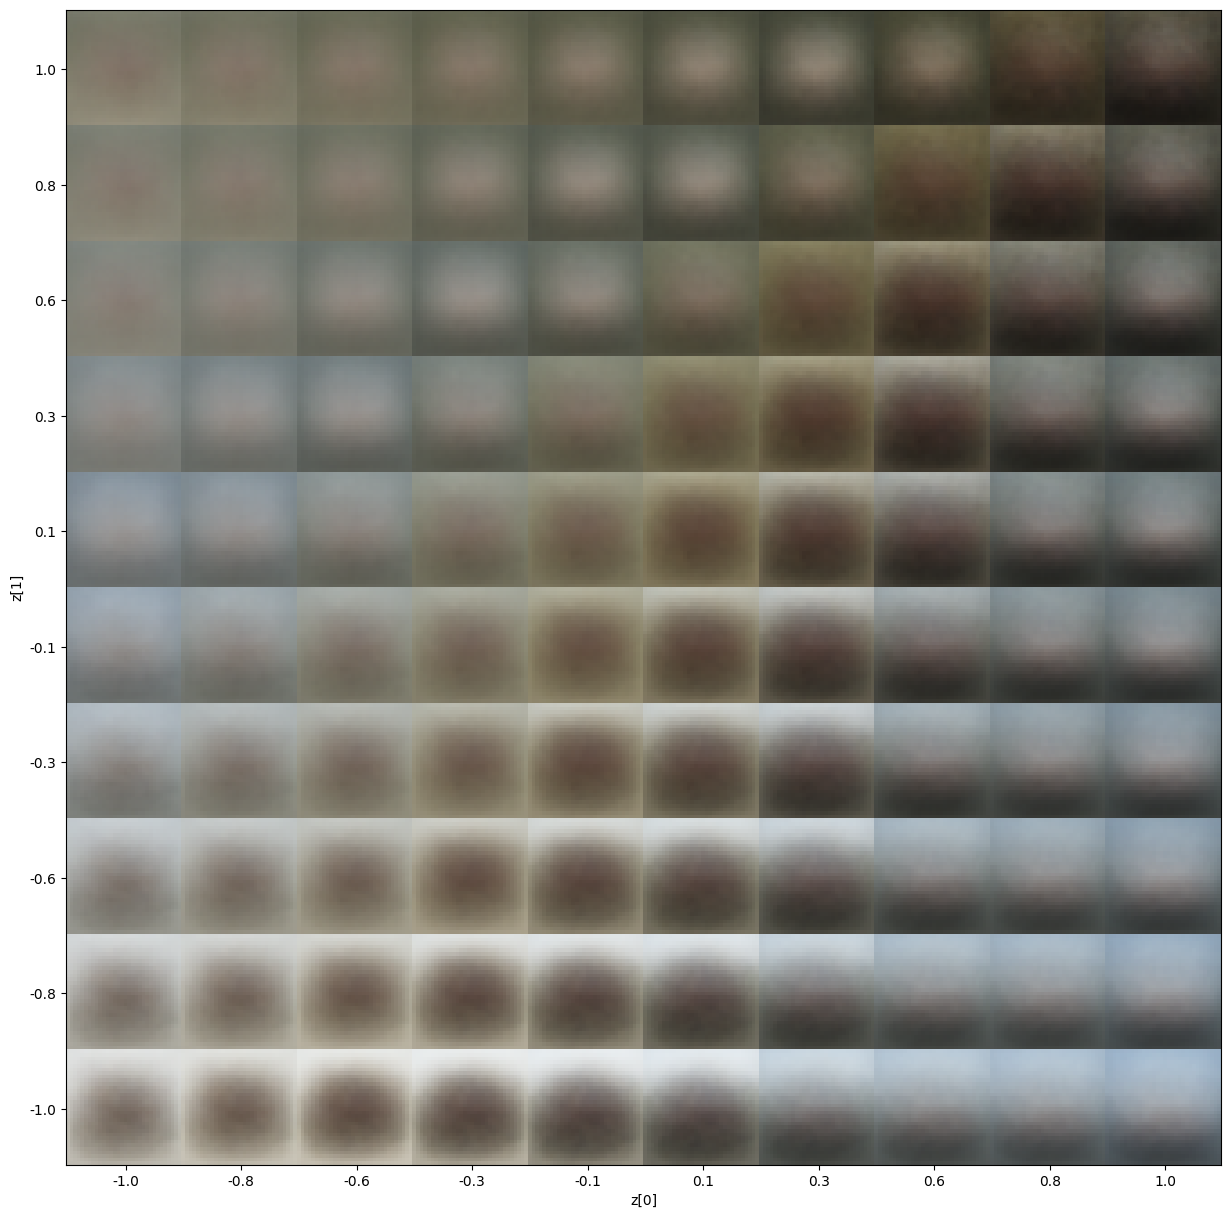

In [22]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=10, figsize=15):
    img_size = 32
    scale = 1.0
    figure = np.zeros((img_size * n, img_size * n,3))
    # linearly spaced coordinates corresponding to the 2D plot
    # of img classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            img = x_decoded[0].reshape(img_size, img_size,3)
            figure[
                i * img_size : (i + 1) * img_size,
                j * img_size : (j + 1) * img_size,
            ] = img

    plt.figure(figsize=(figsize, figsize))
    start_range = img_size // 2
    end_range = n * img_size + start_range
    pixel_range = np.arange(start_range, end_range, img_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure)
    plt.show()


plot_latent_space(vae)

1407/1407 [==============================] - 3s 2ms/step


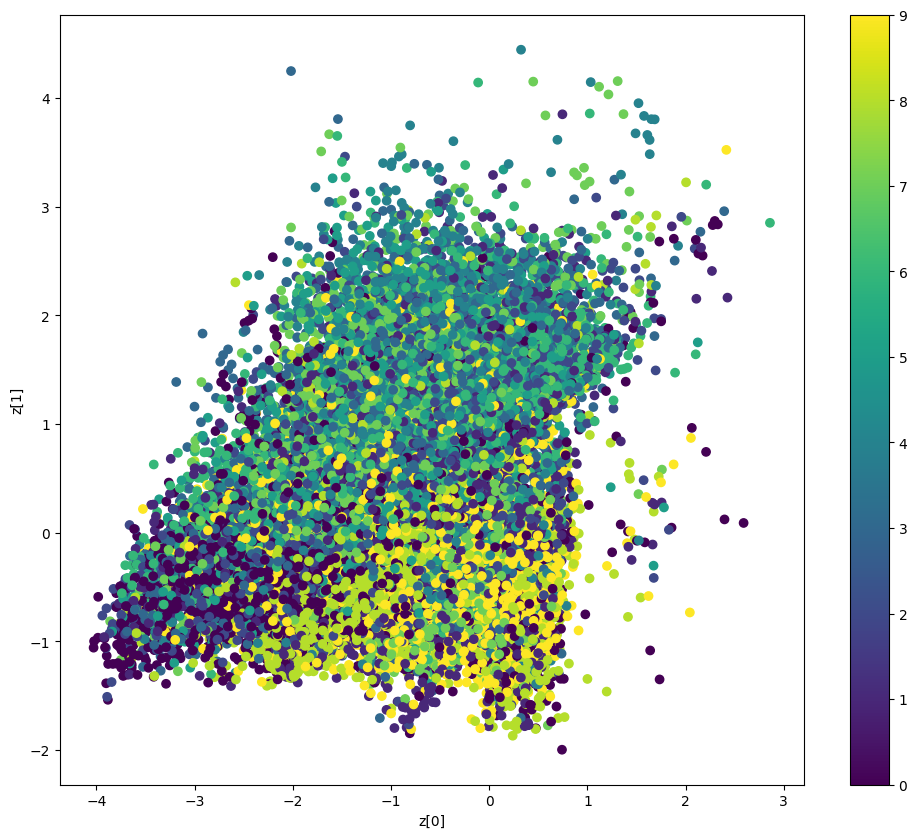

In [23]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(vae, x_train, y_train)